In [ ]:
import pandas as pd
import numpy as np
hcare = pd.read_csv('healthcare_dataset.csv')
hcare.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


Let's use the info() method to get some more information about this dataset and to see if there are any missing values

In [ ]:
hcare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

The Date of Admission column would be even more helpful if we use that as our index. This will allow us to index our data using dates.

In [ ]:
hcare['Date of Admission'] = pd.to_datetime(hcare['Date of Admission']) #convert the values into Pandas DatetimeIndex
hcare.set_index('Date of Admission', inplace = True)
hcare.head()

,Name,Age,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
Date of Admission,,,,,,,,,,,,,,
2022-11-17,Tiffany Ramirez,81,Female,O-,Diabetes,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
2023-06-01,Ruben Burns,35,Male,O+,Asthma,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2019-01-09,Chad Byrd,61,Male,B-,Obesity,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
2020-05-02,Antonio Frederick,49,Male,B-,Asthma,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
2021-07-09,Mrs. Brandy Flowers,51,Male,O-,Arthritis,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


For example, lets see all rows from the year 2019 (date of admission)

In [ ]:
hcare.loc['2019']

,Name,Age,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
Date of Admission,,,,,,,,,,,,,,
2019-01-09,Chad Byrd,61,Male,B-,Obesity,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
2019-05-16,Patty Norman,55,Female,O-,Arthritis,Brian Kennedy,Brown Inc,Blue Cross,13546.817249,384,Elective,2019-06-02,Aspirin,Normal
2019-06-09,Mrs. Caroline Farrell,23,Female,O-,Hypertension,William Miller,Rose Inc,Medicare,6185.903530,126,Emergency,2019-06-26,Paracetamol,Inconclusive
2019-11-15,Olivia Gonzalez,64,Male,AB-,Diabetes,Clayton Mcknight,Cunningham and Sons,Aetna,17394.994264,315,Elective,2019-12-04,Aspirin,Inconclusive
2019-07-10,Sally Shaw,80,Male,O-,Arthritis,Zachary Horton DDS,"Rush, Owens and Johnson",Blue Cross,16609.311817,366,Emergency,2019-08-07,Ibuprofen,Inconclusive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-01,Leslie Wood,62,Female,B+,Asthma,Caitlin Mendez,White Inc,Cigna,31462.122688,478,Elective,2019-07-22,Lipitor,Abnormal
2019-09-15,Sharon Sanchez,43,Male,A+,Arthritis,Debbie Baker,Dyer Inc,UnitedHealthcare,27648.104886,134,Urgent,2019-09-19,Paracetamol,Abnormal
2019-03-06,Colton Weaver,81,Female,AB-,Arthritis,Christian Dixon,"Munoz, Parks and Jimenez",Blue Cross,37726.181757,245,Elective,2019-04-05,Aspirin,Normal


In [ ]:
hcare.index.min()

Timestamp('2018-10-30 00:00:00')

In [ ]:
hcare.index.max()

Timestamp('2023-10-30 00:00:00')

As we can see above, the dataset has data from a period of five years (2018-2023).

In [ ]:
#import matplotlib.pyplot as plt
#plt.hist(hcare['Billing Amount'], bins = 5)
#plt.ylim(1900,2100)
# this is just practice

In [ ]:
#hcare['Medical Condition'].value_counts()
#f2 = pd.DataFrame(hcare['Medical Condition'].value_counts())
#f2.reset_index(inplace = True)
#f2.iloc[:,1]

In [ ]:
#plt.bar(x = hcare['Medical Condition'], height = f2.iloc[:,1] )
#cat2 = hcare['Medical Condition'].astype('category')
#names = cat2.cat.categories
#names


In [ ]:
#h2 = pd.DataFrame(hcare['Medical Condition'].value_counts())
#h2.reset_index(inplace = True)

Asthma          1708
Cancer          1703
Hypertension    1688
Arthritis       1650
Obesity         1628
Diabetes        1623
Name: Medical Condition, dtype: int64

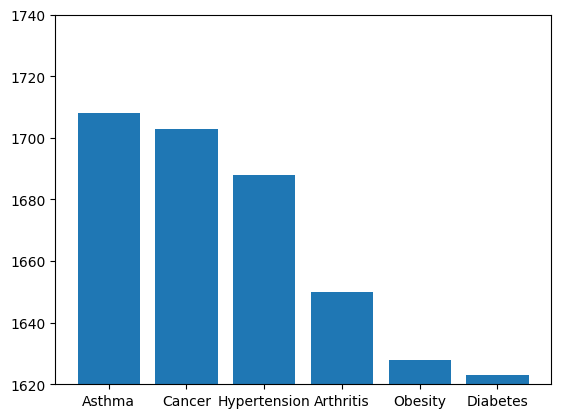

In [ ]:
import matplotlib.pyplot as plt
h2 = pd.DataFrame(hcare['Medical Condition'].value_counts())
h2.reset_index(inplace = True)
plt.bar(h2['index'],h2['Medical Condition']) # the index column consists of the names of the medical conditions and the Medical Condition column stores the respective value counts for each medical condition.
plt.ylim(1620,1740) # since the differences between the value counts is less than 100, rescaling the vertical axis will better highlight the differences.
hcare['Medical Condition'].value_counts()

Asthma is the most common condition among these patients

In [ ]:
hcare.groupby('Gender')['Medical Condition'].value_counts()

Gender  Medical Condition
Female  Cancer               887
        Asthma               874
        Obesity              838
        Hypertension         836
        Diabetes             825
        Arthritis            815
Male    Hypertension         852
        Arthritis            835
        Asthma               834
        Cancer               816
        Diabetes             798
        Obesity              790
Name: Medical Condition, dtype: int64

Among Females, the most common condition is Cancer. Whereas, Hypertension is the most common among Males.

In [ ]:
hcare.loc['2018'].pivot_table(values = 'Age', index = 'Gender', columns = 'Medical Condition', aggfunc = 'mean') # for the year 2018


Medical Condition,Arthritis,Asthma,Cancer,Diabetes,Hypertension,Obesity
Gender,,,,,,
Female,52.939394,51.225806,56.625000,51.357143,47.500000,45.961538
Male,48.000000,49.631579,49.821429,52.636364,51.962963,48.857143


In [ ]:
hcare.loc['2023'].pivot_table(values = 'Age', index = 'Gender', columns = 'Medical Condition', aggfunc = 'mean') # for the year 2023


Medical Condition,Arthritis,Asthma,Cancer,Diabetes,Hypertension,Obesity
Gender,,,,,,
Female,51.105691,51.551471,51.909091,51.272000,50.539683,47.733333
Male,50.568493,49.458904,53.140741,52.516393,49.158273,49.842857


Comparing the average age for medical conditions before and after five years.

It would be nice to have a column that mentions only the year of admission for each patient. Thus, a new column consisting of strings will be made using the DatetimeIndex index we have.


In [ ]:
hcare['Year Only'] = hcare.index.astype('str')
hcare['Year Only'] = hcare['Year Only'].str[0:4] # To extract only the year
hcare.head()

,Name,Age,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Year Only
Date of Admission,,,,,,,,,,,,,,,
2022-11-17,Tiffany Ramirez,81,Female,O-,Diabetes,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive,2022
2023-06-01,Ruben Burns,35,Male,O+,Asthma,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal,2023
2019-01-09,Chad Byrd,61,Male,B-,Obesity,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal,2019
2020-05-02,Antonio Frederick,49,Male,B-,Asthma,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal,2020
2021-07-09,Mrs. Brandy Flowers,51,Male,O-,Arthritis,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal,2021


Now let's take a look at average age across five years for the medical conditions seperated by gender.

In [ ]:
hcare.pivot_table(values = 'Age', index = ['Year Only','Gender'], columns = 'Medical Condition', aggfunc = 'mean')

Medical Condition  Arthritis     Asthma     Cancer   Diabetes  Hypertension  \
Year Only Gender                                                              
2018      Female   52.939394  51.225806  56.625000  51.357143     47.500000   
          Male     48.000000  49.631579  49.821429  52.636364     51.962963   
2019      Female   51.710526  51.290503  51.183784  51.697987     51.789189   
          Male     53.553672  50.682927  51.158621  53.894040     51.612717   
2020      Female   50.095238  54.402439  49.526946  54.704545     50.988372   
          Male     50.727778  50.207317  51.101010  52.141975     51.812865   
2021      Female   53.745455  51.683938  52.422460  50.625000     50.101796   
          Male     52.802395  49.740964  51.915033  50.067416     49.612121   
2022      Female   49.344828  53.497076  52.751445  51.519553     50.182927   
          Male     51.523179  51.868571  50.286624  49.742331     51.259887   
2023      Female   51.105691  51.551471  51.909091  51.272000     50.539683   
          Male     50.568493  49.458904  53.140741  52.516393     49.158273   

Medical Condition    Obesity  
Year Only Gender              
2018      Female   45.961538  
          Male     48.857143  
2019      Female   52.177215  
          Male     49.012903  
2020      Female   53.517241  
          Male     53.013514  
2021      Female   51.305699  
          Male     55.111801  
2022      Female   53.013158  
          Male     52.030303  
2023      Female   47.733333  
          Male     49.842857

<ipython-input-29-398b679ed993>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


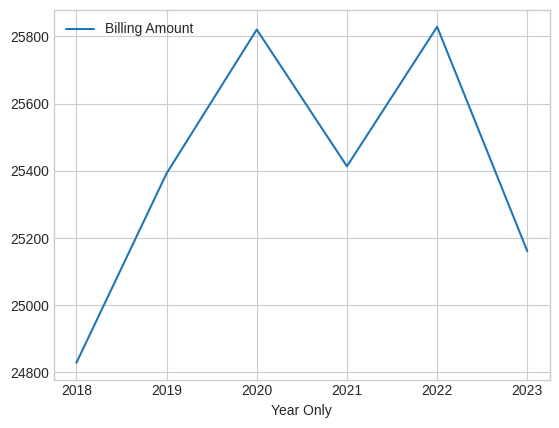

In [ ]:
grp2 = hcare.pivot_table(values = 'Billing Amount', index = ['Year Only'], aggfunc = 'mean') # to compute the average billing amount for each year
plt.style.use('seaborn-whitegrid')
grp2.plot();

It seems to be that in 2023, average billing amount has decreased by $600 if we compare it with that of 2020 where the average billing amount peaked.

Below we will create a column indicating the presence of Asthma as the patient's medical condition, with 1 indicating that the condition is present and 0 indicating that it is not.

In [ ]:
hcare["Asthma"] = hcare['Medical Condition'] == 'Asthma'
hcare['Asthma'] = hcare['Asthma'].astype('int')
hcare.head()

,Name,Age,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Year Only,Asthma
Date of Admission,,,,,,,,,,,,,,,,
2022-11-17,Tiffany Ramirez,81,Female,O-,Diabetes,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive,2022,0
2023-06-01,Ruben Burns,35,Male,O+,Asthma,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal,2023,1
2019-01-09,Chad Byrd,61,Male,B-,Obesity,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal,2019,0
2020-05-02,Antonio Frederick,49,Male,B-,Asthma,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal,2020,1
2021-07-09,Mrs. Brandy Flowers,51,Male,O-,Arthritis,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal,2021,0


Now let's plot the prevalence of Asthma over a five year period

<ipython-input-31-bb2aa929d3b2>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


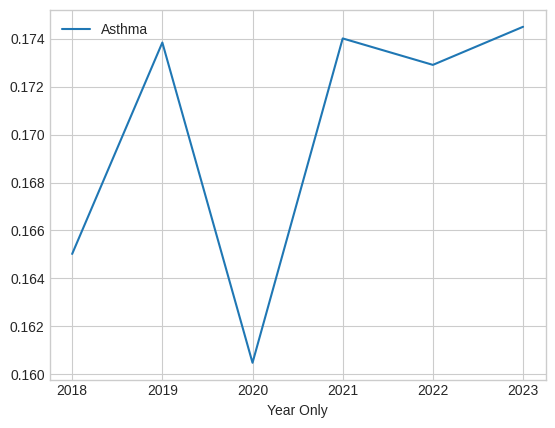

In [ ]:
grp3 = hcare.pivot_table(values = 'Asthma', index = 'Year Only') # to compute means for each year which will give us the proportions.
plt.style.use('seaborn-whitegrid')
grp3.plot();

Asthma seems to be more prevalent after five years as in 2023 around %17 of the patients were seeking healthcare services for it compared to around %16 during 2018.